In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# loading the file containing the dataset and creating a dataframe of the dataset
df =pd.read_csv('/content/drive/My Drive/datasets/fake_job_postings.csv')
# display few records of the dataset
df.head(10)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
5,6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
7,8,Lead Guest Service Specialist,"US, CA, San Francisco",NaN,NaN,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,1,1,NaN,NaN,NaN,NaN,NaN,0
8,9,HP BSM SME,"US, FL, Pensacola",NaN,NaN,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,NaN,0,1,1,Full-time,Associate,NaN,Information Technology and Services,NaN,0
9,10,Customer Service Associate - Part Time,"US, AZ, Phoenix",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,NaN,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0


In [ ]:
# check the number of rows and columns of the dataset
df.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

In [ ]:
# check the number of rows and columns of the dataset
df.shape

(17880, 18)

In [ ]:
# display the statistics of the numerical columns
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


From the above statistics we can gather that the columns 'telecommuting', 'has_company_logo', 'has_questions', 'fraudulent' are quantitative variables having 2 values - 0 and 1.

In [ ]:
# display the number of unique values each column has
unique_counts = df.nunique()
print(unique_counts)

job_id                 17880
title                  11231
location                3105
department              1337
salary_range             874
company_profile         1709
description            14801
requirements           11968
benefits                6205
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent                 2
dtype: int64


In [ ]:
# columns that have only 2 values - 0 and 1
binary_columns = ['telecommuting', 'has_company_logo', 'has_questions']

In [ ]:
# display the unique values each column has
columns = ['title', 'location', 'department', 'salary_range', 'telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience',
           'required_education', 'industry', 'function']

for column in columns:
    print(f"{column}")
    print(df[column].value_counts())
    print()

title
English Teacher Abroad                                         311
Customer Service Associate                                     146
Graduates: English Teacher Abroad (Conversational)             144
English Teacher Abroad                                          95
Software Engineer                                               86
                                                              ... 
West Coast Regional Channel Manager (RCM)                        1
BI Practice Manager                                              1
Community Coordinator- Ambassador Programme                      1
Senior Traffic Engineer                                          1
Project Cost Control Staff Engineer - Cost Control Exp - TX      1
Name: title, Length: 11231, dtype: int64

location
GB, LND, London          718
US, NY, New York         658
US, CA, San Francisco    472
GR, I, Athens            464
US, ,                    339
                        ... 
GB, SFK, Leiston           1
GB,

In [ ]:
# columns that have only 2 values - 0 and 1
binary_columns = ['telecommuting', 'has_company_logo', 'has_questions']

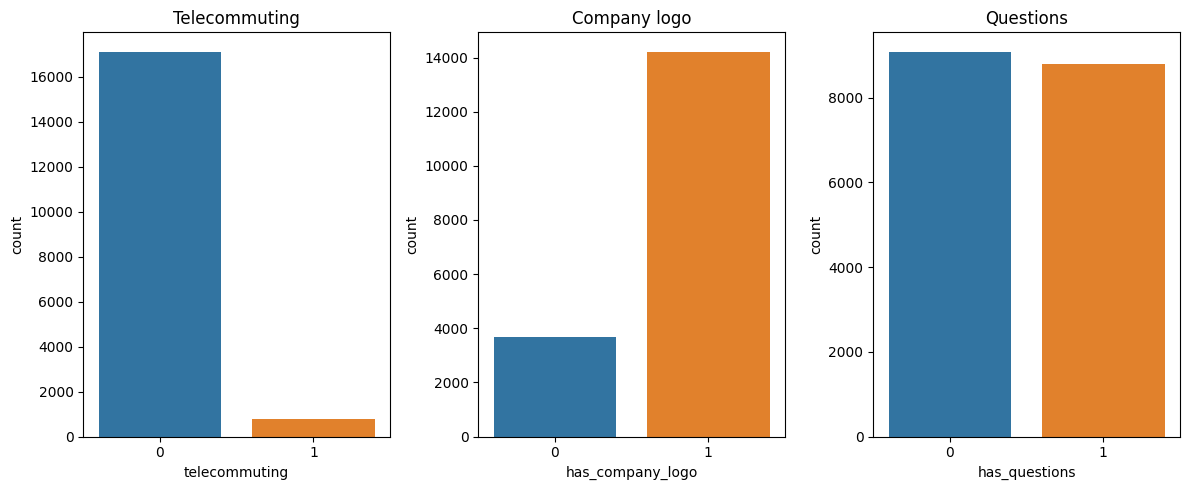

In [ ]:
# plotting the countplots for the binary columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))
sns.countplot(x='telecommuting', data=df, ax=axes[0])
axes[0].set_title('Telecommuting')

sns.countplot(x='has_company_logo', data=df, ax=axes[1])
axes[1].set_title('Company logo')

sns.countplot(x='has_questions', data=df, ax=axes[2])
axes[2].set_title('Questions')

plt.tight_layout()
plt.show()

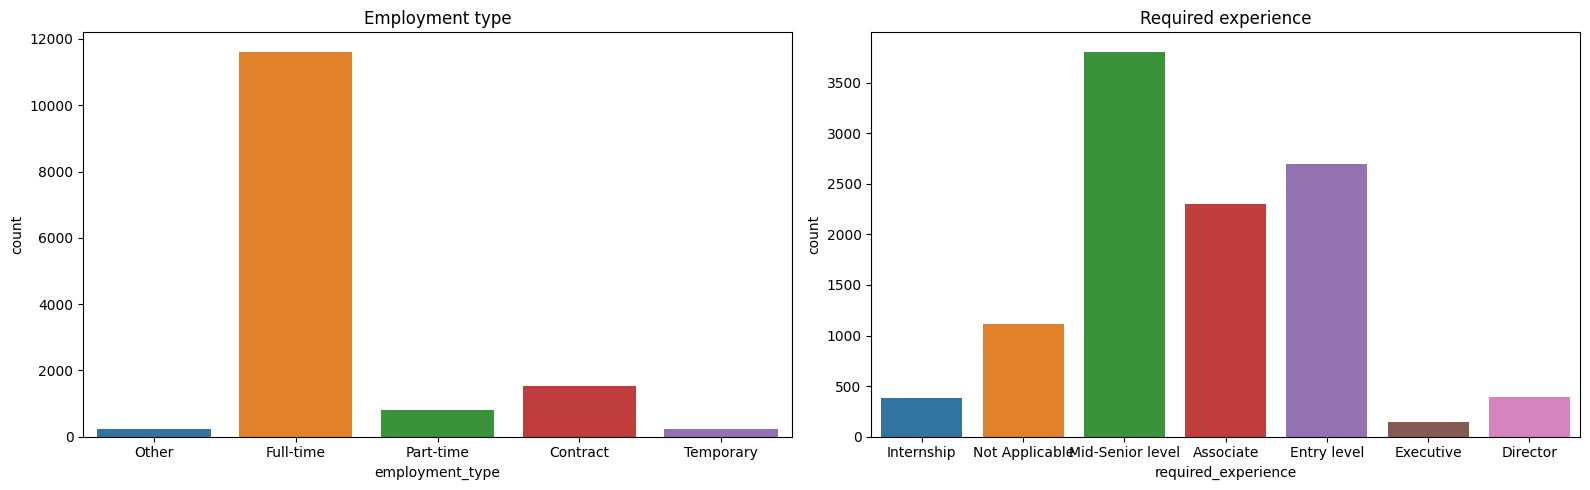

In [ ]:
# plotting the countplots for the columns- employment_type and required_experience
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
sns.countplot(x='employment_type', data=df, ax=axes[0])
axes[0].set_title('Employment type')

sns.countplot(x='required_experience', data=df, ax=axes[1])
axes[1].set_title('Required experience')

plt.tight_layout()
plt.show()

Most job postings are for full-time jobs.
We can also observe that many job postings do not specify any required experience. If specified, most jobs seem to require mid-senior level experience.

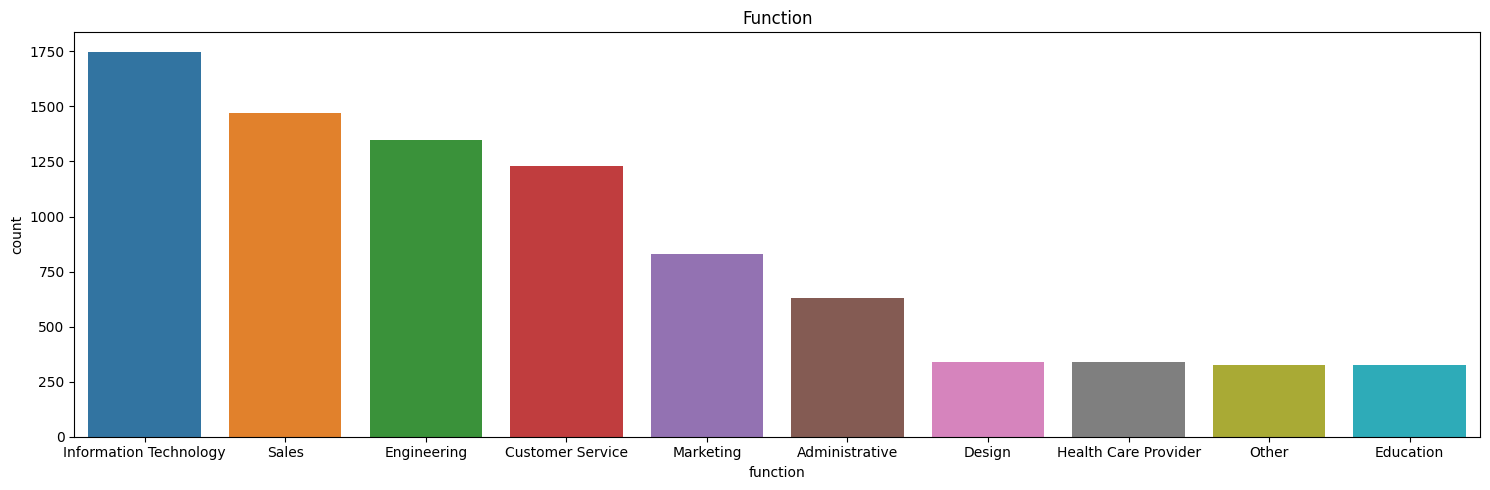

In [ ]:
# plotting the countplots for the column- function
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
sns.countplot(x = 'function', data = df, order = df['function'].value_counts()[:10].index, ax=axes)
axes.set_title('Function')

plt.tight_layout()
plt.show()

Ignoring the 'None' value, jobs in Information Technology, Sales, Engineering, Customer Service sectors are in high demand.

In [ ]:
print(df['fraudulent'].value_counts())

0    17014
1      866
Name: fraudulent, dtype: int64


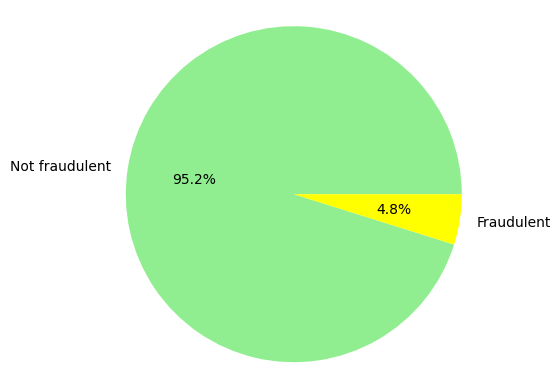

In [ ]:
# visualizing the class imbalance using piechart
labels = ['Not fraudulent', 'Fraudulent']
sizes = [df['fraudulent'].value_counts()[0], df['fraudulent'].value_counts()[1]]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors = ['lightgreen', 'yellow'])
plt.axis('equal')
plt.show()

The counts of the values 'Fraudulent'(1) and 'Not Fraudulent'(0) of the 'fraudulent' column show that there is an class imbalance in the dataset. Considering the nature of the problem, it is not surprising that there is more data for 'Not Fraudulent'. The pie chart above visualizes this imbalance.

In [ ]:
# checking for NA values in the dataset
df.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

Multiple columns in the dataset have null values which will be handled ahead.

In [ ]:
# checking for duplicate records in the dataset
df.duplicated().sum()

0

In [ ]:
# dropping the 'job_id' column as it is irrelevant to the task at hand
df.drop(columns=['job_id'],inplace=True)

<ipython-input-143-925f89687905>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


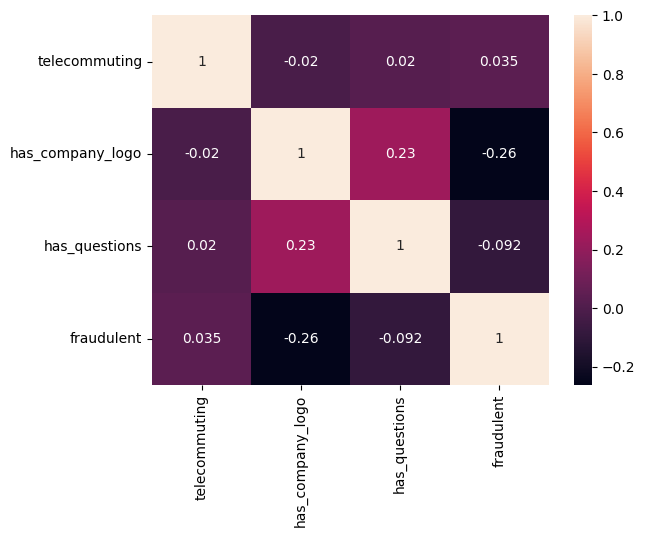

In [ ]:
# displaying the correlation heatmap to check for multicollinear features
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

From the above heatmap we can observe that none of the columns showed in the heatmap are highly correlated.

In [ ]:
df['location']

0            US, NY, New York
1              NZ, , Auckland
2               US, IA, Wever
3          US, DC, Washington
4          US, FL, Fort Worth
                 ...         
17875         CA, ON, Toronto
17876    US, PA, Philadelphia
17877         US, TX, Houston
17878           NG, LA, Lagos
17879       NZ, N, Wellington
Name: location, Length: 17880, dtype: object

In [ ]:
# creating a function to retrieve only the country from the 'location' column. This column originally contains the country and cities as well. The retrieved countries are then inserted into a ne3w column 'country'.
def split(location):
    if pd.notna(location):
        address = location.split(',')
        return address[0]
    else:
        return None

df['country'] = df['location'].apply(split)

In [ ]:
# displaying unique values of the retrieved countries and their counts
df['country'].value_counts()

US    10656
GB     2384
GR      940
CA      457
DE      383
      ...  
SI        1
PE        1
SD        1
UG        1
KH        1
Name: country, Length: 90, dtype: int64

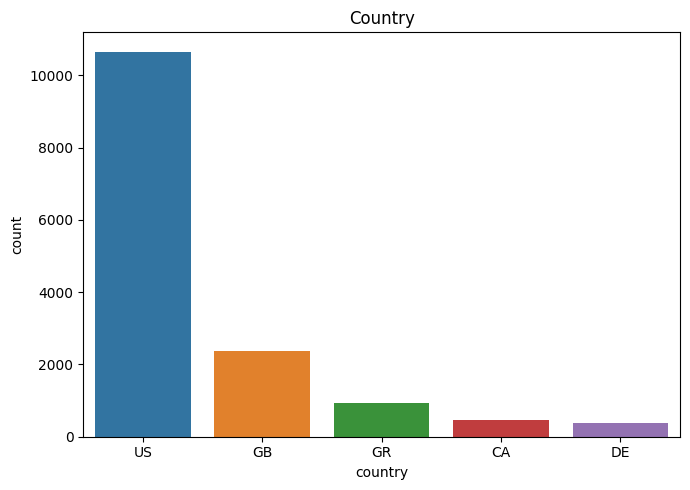

In [ ]:
# plotting the countplot for the new column- country
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))
sns.countplot(x = 'country', data = df, order = df['country'].value_counts()[:5].index, ax=axes)
axes.set_title('Country')

plt.tight_layout()
plt.show()

We can observe that most of the job posting data has US as its location.

In [ ]:
# check number of unique countries
country_counts = df['country'].nunique()
print(country_counts)

90


In [ ]:
# these columns contain NA values.
cols_tofill=['title','location', 'department', 'salary_range', 'company_profile','description', 'requirements', 'benefits',
             'employment_type','required_experience','required_education','industry','function']

In [ ]:
# Replacing the NA values with None
df[cols_tofill] = df[cols_tofill].fillna(value='None')

In [ ]:
# After replacement, there are no NA values
df.isna().sum()

title                    0
location                 0
department               0
salary_range             0
company_profile          0
description              0
requirements             0
benefits                 0
telecommuting            0
has_company_logo         0
has_questions            0
employment_type          0
required_experience      0
required_education       0
industry                 0
function                 0
fraudulent               0
country                346
dtype: int64

In [ ]:
df

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,Marketing Intern,"US, NY, New York",Marketing,None,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,None,0,1,0,Other,Internship,None,None,Marketing,0,US
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,None,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,None,Marketing and Advertising,Customer Service,0,NZ
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",None,None,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,None,0,1,0,None,None,None,None,None,0,US
3,Account Executive - Washington DC,"US, DC, Washington",Sales,None,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,Bill Review Manager,"US, FL, Fort Worth",None,None,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,None,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,None,Computer Software,Sales,0,CA
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,None,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,US
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",None,None,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,None,0,0,0,Full-time,None,None,None,None,0,US
17878,Graphic Designer,"NG, LA, Lagos",None,None,None,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0,NG


In [ ]:
# Creating two new dataframes where the fakejobs dataframe contains only fradulent job posting records whereas the realjobs dataframe contains only real job posting records.
fakejobs = df[df['fraudulent']==1]
realjobs = df[df['fraudulent']==0]

Text(0.5, 0, 'Function')

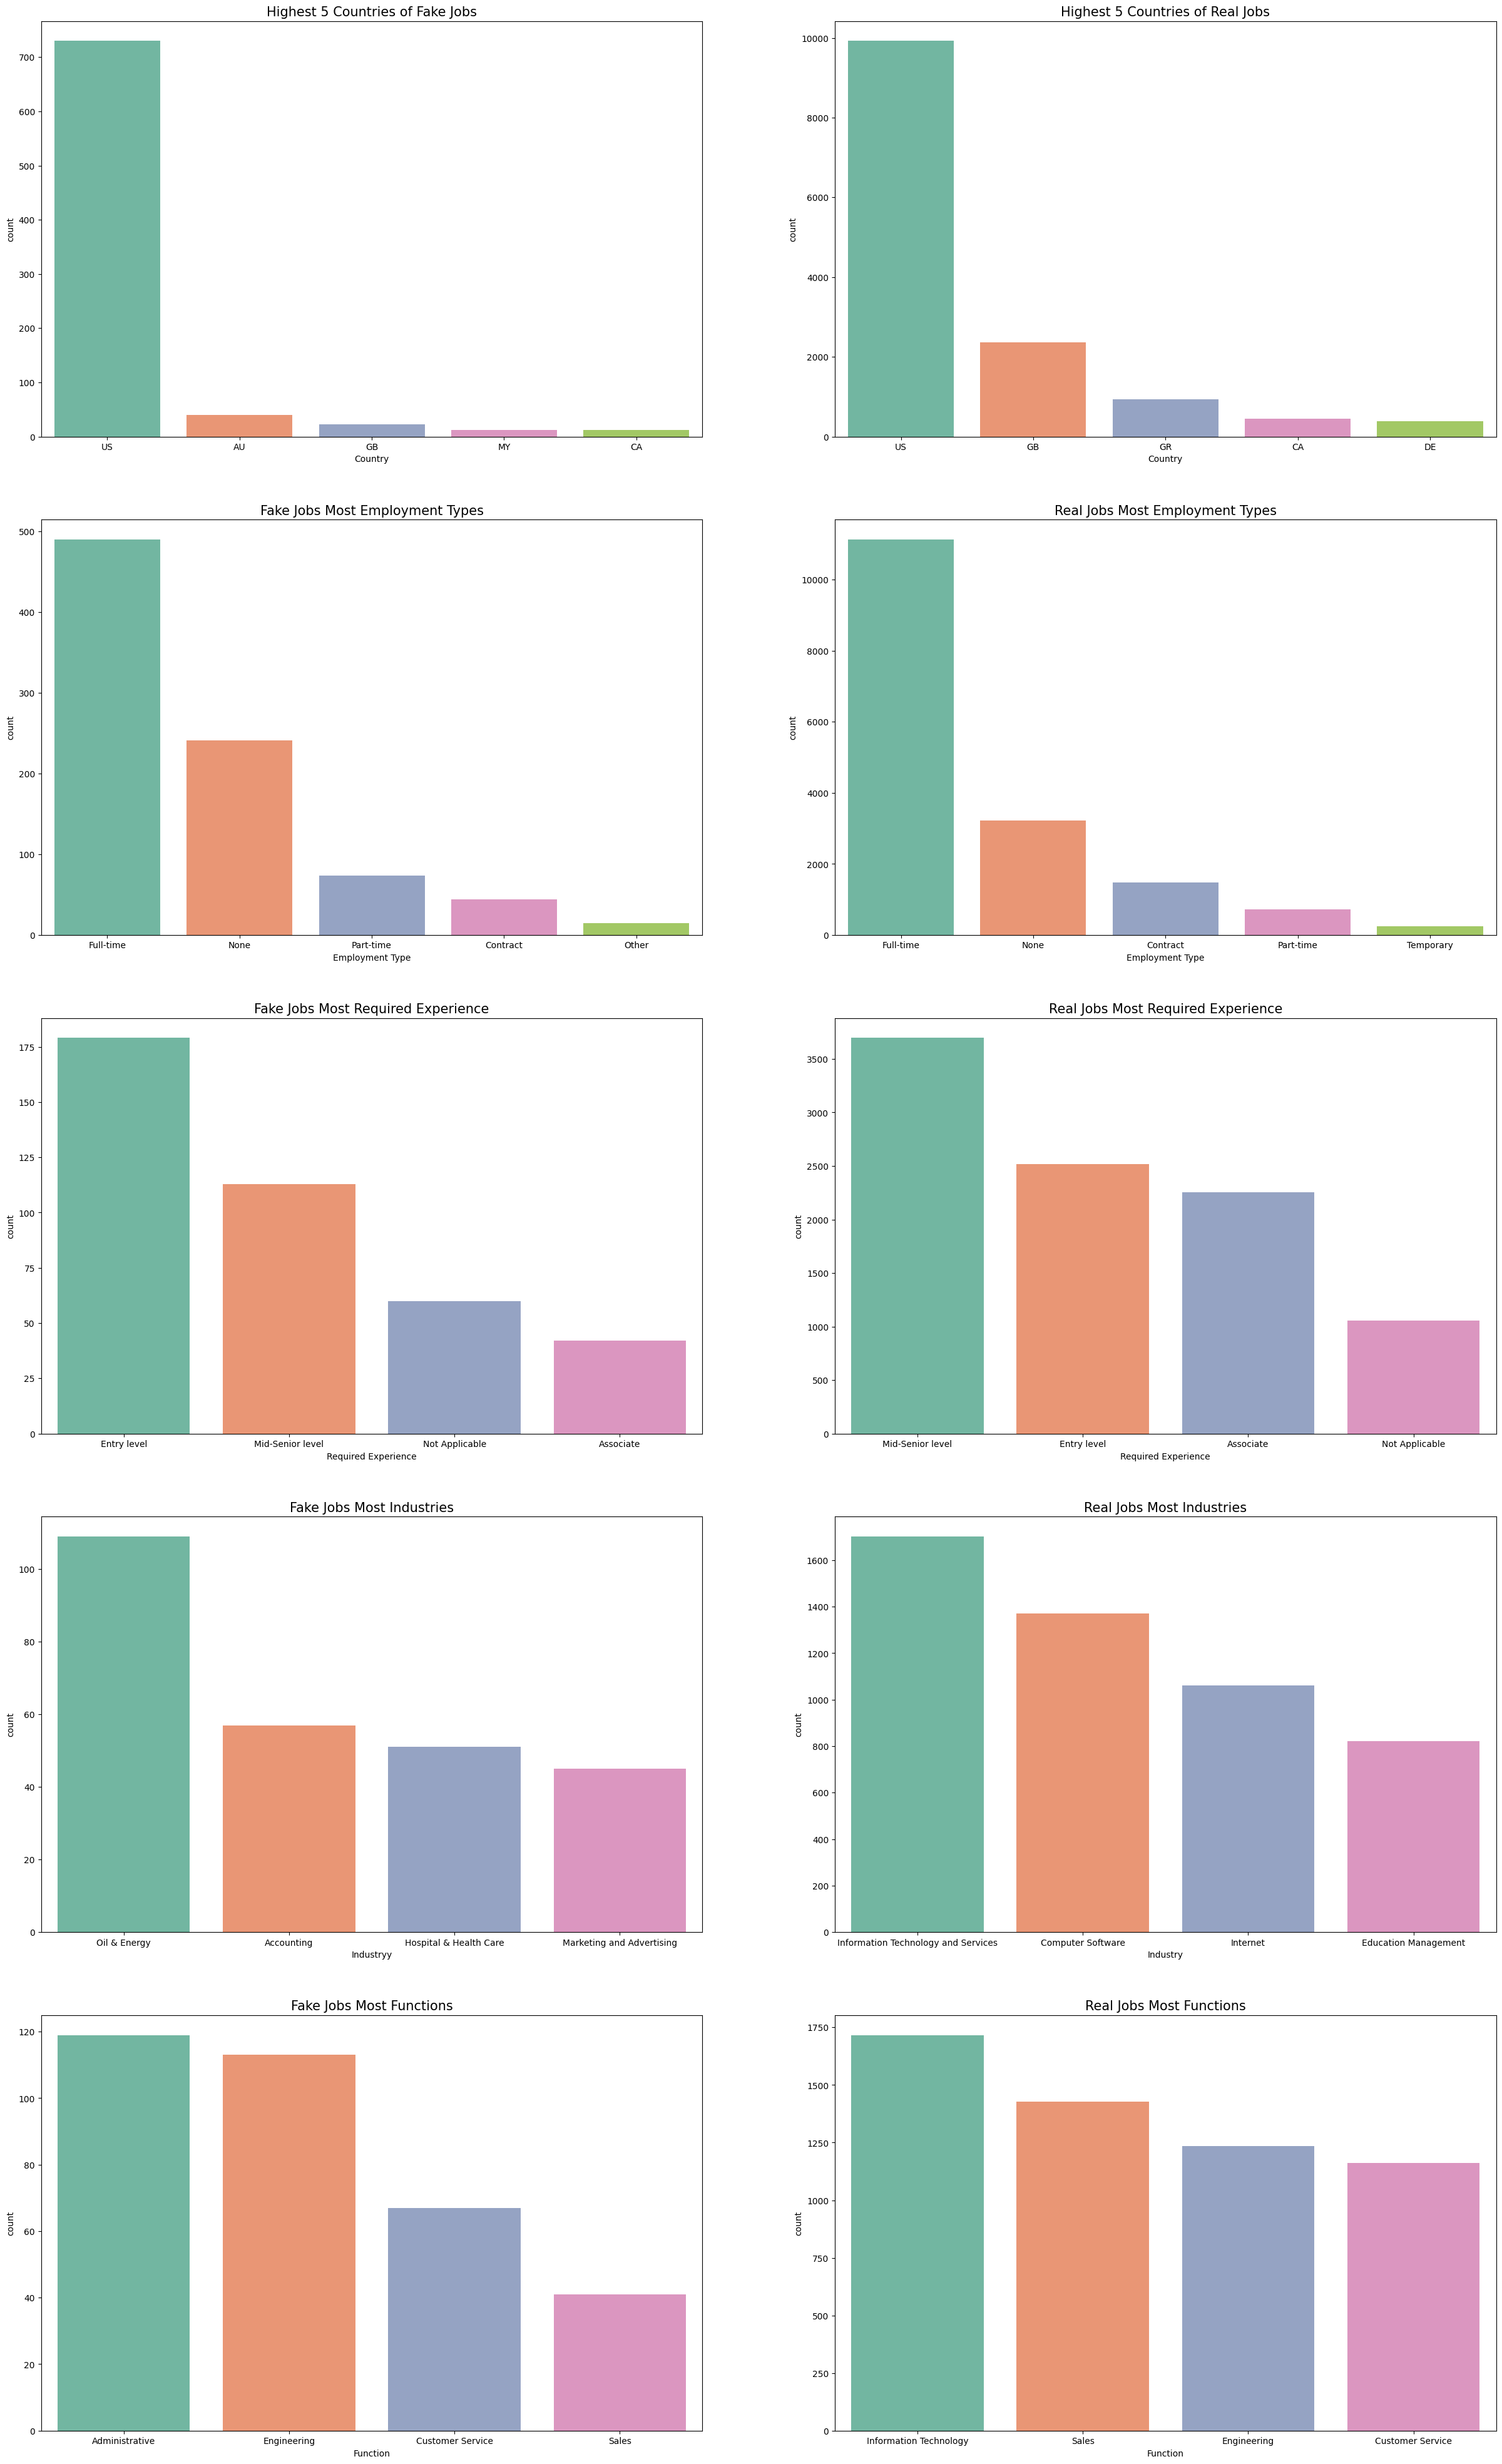

In [ ]:
# plotting the countplots for columns- country, employment_type, required_experience, industry, and function for both the dataframes separately
fig,axes=plt.subplots(5,2,figsize=(30,50))
sns.countplot(x = 'country', data = fakejobs, palette='Set2',order = fakejobs['country'].value_counts()[:5].index, ax=axes[0,0])
sns.countplot(x = 'country', data = realjobs, palette='Set2',order = realjobs['country'].value_counts()[:5].index,ax=axes[0,1])
axes[0,0].set_title('Highest 5 Countries of Fake Jobs',fontsize=15)
axes[0,1].set_title('Highest 5 Countries of Real Jobs',fontsize=15)
axes[0,0].set_xlabel('Country')
axes[0,1].set_xlabel('Country')

sns.countplot(x = 'employment_type', data = fakejobs, palette='Set2',order = fakejobs['employment_type'].value_counts()[:5].index,ax=axes[1,0])
sns.countplot(x = 'employment_type', data = realjobs, palette='Set2',order = realjobs['employment_type'].value_counts()[:5].index,ax=axes[1,1])
axes[1,0].set_title('Fake Jobs Most Employment Types',fontsize=15)
axes[1,1].set_title('Real Jobs Most Employment Types',fontsize=15)
axes[1,0].set_xlabel('Employment Type')
axes[1,1].set_xlabel('Employment Type')

sns.countplot(x = 'required_experience', data = fakejobs, palette='Set2',order = fakejobs['required_experience'].value_counts()[1:5].index,ax=axes[2,0])
sns.countplot(x = 'required_experience', data = realjobs, palette='Set2',order = realjobs['required_experience'].value_counts()[1:5].index,ax=axes[2,1])
axes[2,0].set_title('Fake Jobs Most Required Experience',fontsize=15)
axes[2,1].set_title('Real Jobs Most Required Experience',fontsize=15)
axes[2,0].set_xlabel('Required Experience')
axes[2,1].set_xlabel('Required Experience')

sns.countplot(x = 'industry', data = fakejobs, palette='Set2',order = fakejobs['industry'].value_counts()[1:5].index,ax=axes[3,0])
sns.countplot(x = 'industry', data = realjobs, palette='Set2',order = realjobs['industry'].value_counts()[1:5].index,ax=axes[3,1])
axes[3,0].set_title('Fake Jobs Most Industries',fontsize=15)
axes[3,1].set_title('Real Jobs Most Industries',fontsize=15)
axes[3,0].set_xlabel('Industryy')
axes[3,1].set_xlabel('Industry')

sns.countplot(x = 'function', data = fakejobs, palette='Set2',order = fakejobs['function'].value_counts()[1:5].index,ax=axes[4,0])
sns.countplot(x = 'function', data = realjobs, palette='Set2',order = realjobs['function'].value_counts()[1:5].index,ax=axes[4,1])
axes[4,0].set_title('Fake Jobs Most Functions',fontsize=15)
axes[4,1].set_title('Real Jobs Most Functions',fontsize=15)
axes[4,0].set_xlabel('Function')
axes[4,1].set_xlabel('Function')

Maximum number of fake job postings seem to be from the Oil & energy industry.

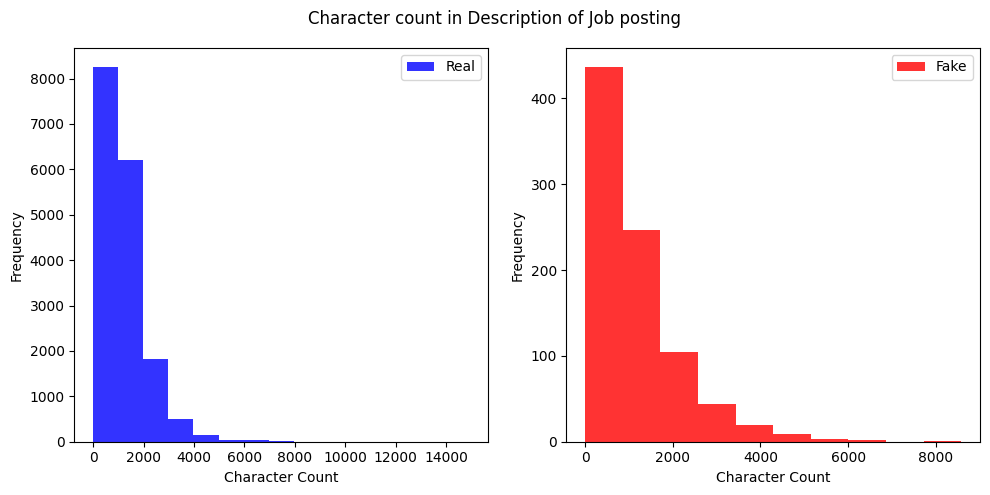

In [ ]:
# plotting histograms for the character count of 'description' for both dataframes
fig,axes=plt.subplots(1,2,figsize=(10,5))

df[df['fraudulent']==0]['description'].str.len().plot(bins=15, kind='hist', color='blue', label='Real', alpha=0.8, ax=axes[0])
df[df['fraudulent']==1]['description'].str.len().plot(bins=10, kind='hist', color='red', label='Fake', alpha=0.8, ax=axes[1])
fig.suptitle('Character count in Description of Job posting')
axes[0].set_xlabel("Character Count")
axes[0].set_ylabel("Frequency")
axes[0].legend()

axes[1].set_xlabel("Character Count")
axes[1].set_ylabel("Frequency")
axes[1].legend()

plt.tight_layout()
plt.show()

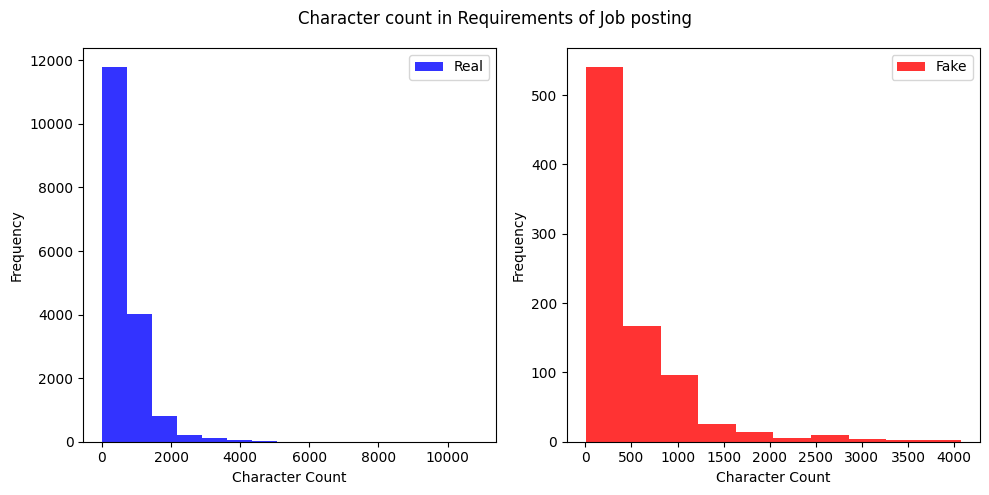

In [ ]:
# plotting histograms for the character count of 'requirements' for both dataframes
fig,axes=plt.subplots(1,2,figsize=(10,5))

df[df['fraudulent']==0]['requirements'].str.len().plot(bins=15, kind='hist', color='blue', label='Real', alpha=0.8, ax=axes[0])
df[df['fraudulent']==1]['requirements'].str.len().plot(bins=10, kind='hist', color='red', label='Fake', alpha=0.8, ax=axes[1])
fig.suptitle('Character count in Requirements of Job posting')
axes[0].set_xlabel("Character Count")
axes[0].set_ylabel("Frequency")
axes[0].legend()

axes[1].set_xlabel("Character Count")
axes[1].set_ylabel("Frequency")
axes[1].legend()

plt.tight_layout()
plt.show()

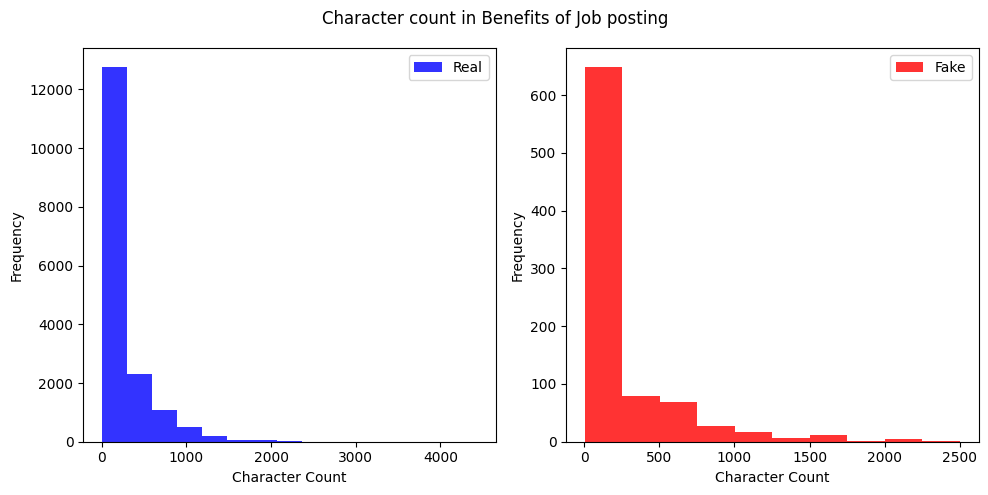

In [ ]:
# plotting histograms for the character count of 'benefits' for both dataframes
fig,axes=plt.subplots(1,2,figsize=(10,5))

df[df['fraudulent']==0]['benefits'].str.len().plot(bins=15, kind='hist', color='blue', label='Real', alpha=0.8, ax=axes[0])
df[df['fraudulent']==1]['benefits'].str.len().plot(bins=10, kind='hist', color='red', label='Fake', alpha=0.8, ax=axes[1])
fig.suptitle('Character count in Benefits of Job posting')
axes[0].set_xlabel("Character Count")
axes[0].set_ylabel("Frequency")
axes[0].legend()

axes[1].set_xlabel("Character Count")
axes[1].set_ylabel("Frequency")
axes[1].legend()

plt.tight_layout()
plt.show()

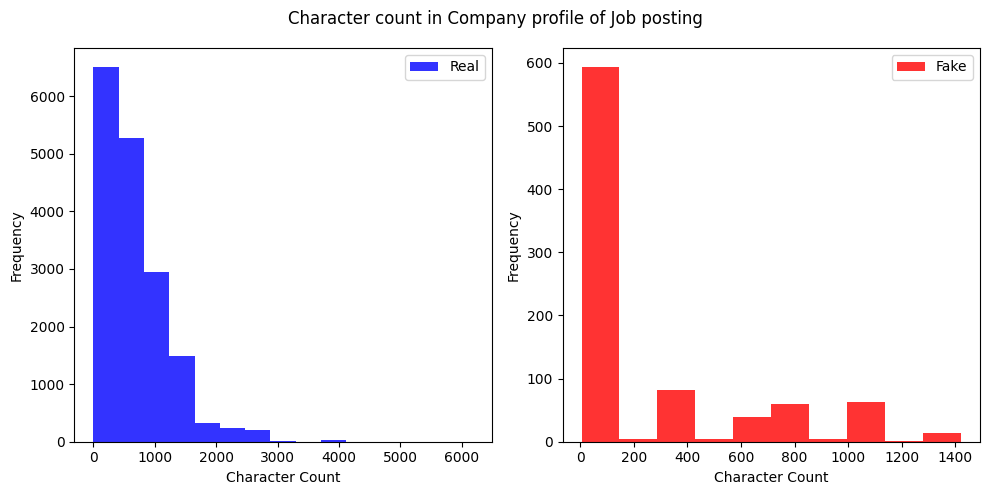

In [ ]:
# plotting histograms for the character count of 'company_profile' for both dataframes
fig,axes=plt.subplots(1,2,figsize=(10,5))

df[df['fraudulent']==0]['company_profile'].str.len().plot(bins=15, kind='hist', color='blue', label='Real', alpha=0.8, ax=axes[0])
df[df['fraudulent']==1]['company_profile'].str.len().plot(bins=10, kind='hist', color='red', label='Fake', alpha=0.8, ax=axes[1])
fig.suptitle('Character count in Company profile of Job posting')
axes[0].set_xlabel("Character Count")
axes[0].set_ylabel("Frequency")
axes[0].legend()

axes[1].set_xlabel("Character Count")
axes[1].set_ylabel("Frequency")
axes[1].legend()

plt.tight_layout()
plt.show()

The distributions for most of the descriptive columns seem to be similar for both fake and real job postings. However, the character count for 'Company Profile' seems to be higher for Real job postings compared to fake ones.

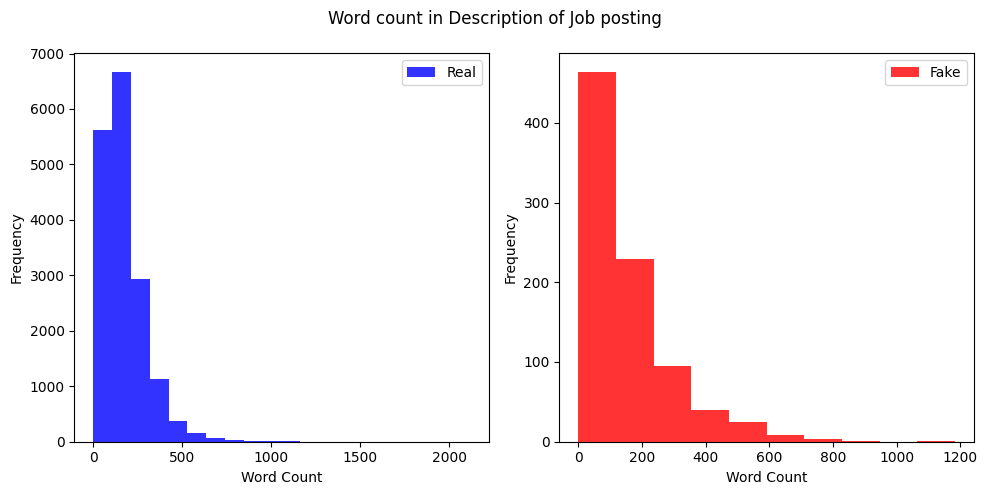

In [ ]:
# plotting histograms for the word count of 'description' for both dataframes
fig,axes=plt.subplots(1,2,figsize=(10,5))

df[df['fraudulent']==0]['description'].apply(lambda x: len(str(x).split())).plot(bins=20, kind='hist', color='blue', label='Real', alpha=0.8, ax=axes[0])
df[df['fraudulent']==1]['description'].apply(lambda x: len(str(x).split())).plot(bins=10, kind='hist', color='red', label='Fake', alpha=0.8, ax=axes[1])
fig.suptitle('Word count in Description of Job posting')
axes[0].set_xlabel("Word Count")
axes[0].set_ylabel("Frequency")
axes[0].legend()

axes[1].set_xlabel("Word Count")
axes[1].set_ylabel("Frequency")
axes[1].legend()

plt.tight_layout()
plt.show()

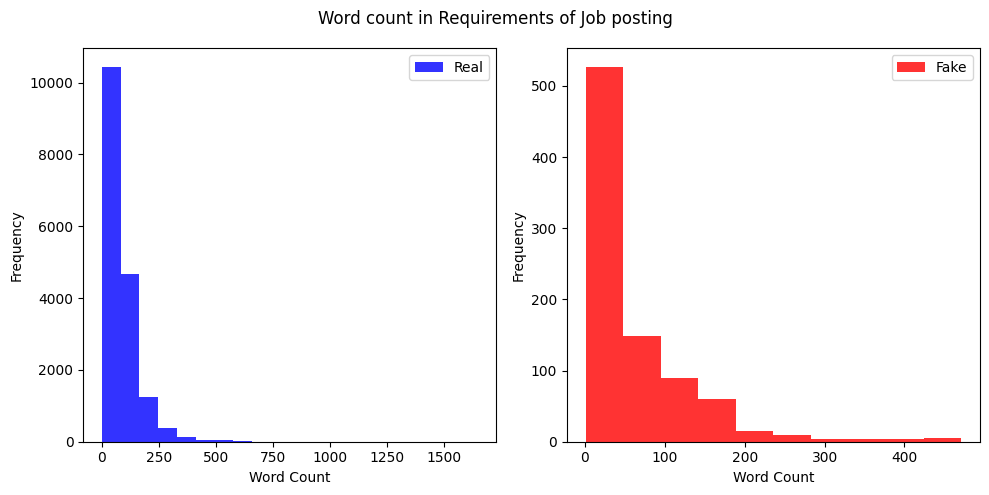

In [ ]:
# plotting histograms for the word count of 'requirements' for both dataframes
fig,axes=plt.subplots(1,2,figsize=(10,5))

df[df['fraudulent']==0]['requirements'].apply(lambda x: len(str(x).split())).plot(bins=20, kind='hist', color='blue', label='Real', alpha=0.8, ax=axes[0])
df[df['fraudulent']==1]['requirements'].apply(lambda x: len(str(x).split())).plot(bins=10, kind='hist', color='red', label='Fake', alpha=0.8, ax=axes[1])
fig.suptitle('Word count in Requirements of Job posting')
axes[0].set_xlabel("Word Count")
axes[0].set_ylabel("Frequency")
axes[0].legend()

axes[1].set_xlabel("Word Count")
axes[1].set_ylabel("Frequency")
axes[1].legend()

plt.tight_layout()
plt.show()

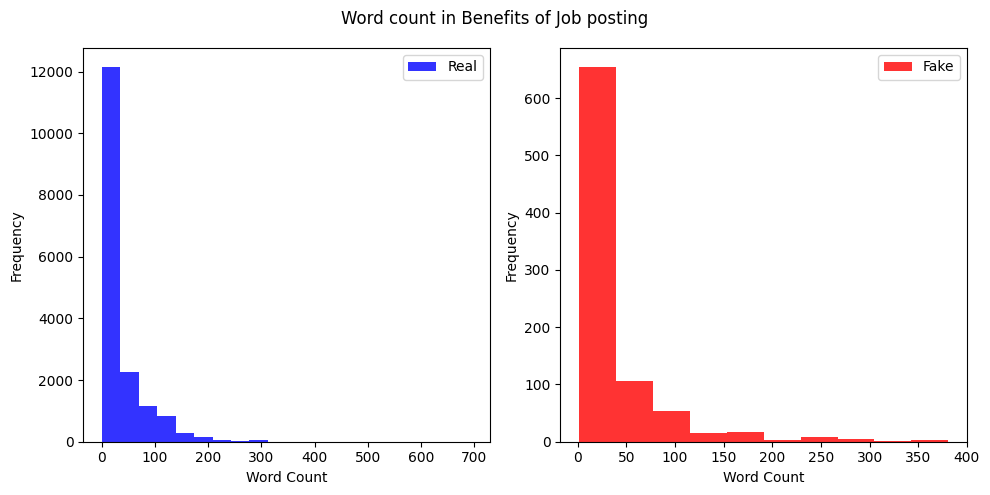

In [ ]:
# plotting histograms for the word count of 'benefits' for both dataframes
fig,axes=plt.subplots(1,2,figsize=(10,5))

df[df['fraudulent']==0]['benefits'].apply(lambda x: len(str(x).split())).plot(bins=20, kind='hist', color='blue', label='Real', alpha=0.8, ax=axes[0])
df[df['fraudulent']==1]['benefits'].apply(lambda x: len(str(x).split())).plot(bins=10, kind='hist', color='red', label='Fake', alpha=0.8, ax=axes[1])
fig.suptitle('Word count in Benefits of Job posting')
axes[0].set_xlabel("Word Count")
axes[0].set_ylabel("Frequency")
axes[0].legend()

axes[1].set_xlabel("Word Count")
axes[1].set_ylabel("Frequency")
axes[1].legend()

plt.tight_layout()
plt.show()

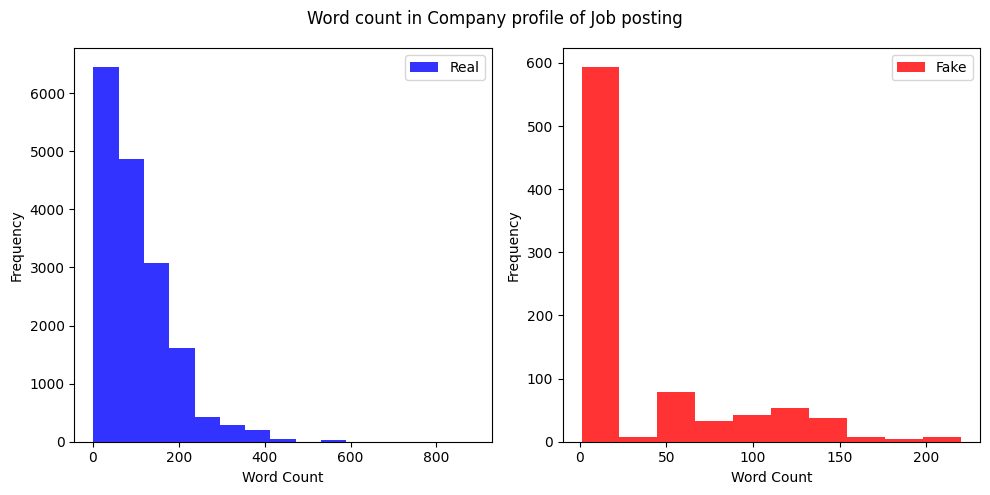

In [ ]:
# plotting histograms for the word count of 'company_profile' for both dataframes
fig,axes=plt.subplots(1,2,figsize=(10,5))

df[df['fraudulent']==0]['company_profile'].apply(lambda x: len(str(x).split())).plot(bins=15, kind='hist', color='blue', label='Real', alpha=0.8, ax=axes[0])
df[df['fraudulent']==1]['company_profile'].apply(lambda x: len(str(x).split())).plot(bins=10, kind='hist', color='red', label='Fake', alpha=0.8, ax=axes[1])
fig.suptitle('Word count in Company profile of Job posting')
axes[0].set_xlabel("Word Count")
axes[0].set_ylabel("Frequency")
axes[0].legend()

axes[1].set_xlabel("Word Count")
axes[1].set_ylabel("Frequency")
axes[1].legend()

plt.tight_layout()
plt.show()

Similarly, the distributions for most of the descriptive columns seem to be similar for both fake and real job postings. However, the word count for 'Company Profile' seems to be higher for Real job postings compared to fake ones.

In [ ]:
#Combining all the text columns
df['text'] =  df['title'] + ' ' + df['country'] + ' ' + df['company_profile'] + ' ' +  df['description'] + ' ' + df['requirements'] + ' ' + \
              df['benefits'] + ' ' + df['required_experience'] + ' ' + df['required_education'] + ' ' + df['industry'] + ' ' + df['function']

In [ ]:
#Display first element of text column
df['text'][0]

"Marketing Intern US We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City. Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and

Now that we have these huge combinations of words to handle, we should be handling it by considering the most repeated/common words in all the instances. However, common words like articles and verbs should be ignored as they don't contribute anything towards defining a particular job posting. One of the method to handle these kind of situations is using the Word Net Lemmatizer module. WordNetLemmatizer is used for reducing the words to base/root form when there is huge amount of data as we saw in this case.

In [ ]:
#Change text column to list
text = df.text.to_list()

In [ ]:
#display first element of text
text[0]

"Marketing Intern US We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City. Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and

In [ ]:
#length of text
len(text)

17880

In [ ]:
#download required libraries from nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
lemmatizer = WordNetLemmatizer()
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Join the text elements into a single string
cloud_text = ' '.join(map(str,text))
# Tokenize the text
token_text_cloud = word_tokenize(cloud_text)
# Convert tokens to lowercase
lower_tokens_cloud = [t.lower() for t in token_text_cloud]
# Count the frequency of each word
word_freq_cloud = Counter(lower_tokens_cloud)
print(Counter.most_common(word_freq_cloud, 10))
text_only_alphabets_cloud = [t for t in lower_tokens_cloud if t.isalpha()]
english_stopped_cloud = stopwords.words('english')
no_stops_cloud = [t for t in text_only_alphabets_cloud if t not in english_stopped_cloud]
# Lemmatize the words
lemmatized_words_cloud = [lemmatizer.lemmatize(t) for t in no_stops_cloud]
bow = Counter(lemmatized_words_cloud)
print(Counter.most_common(bow, 10))

[(',', 364690), ('and', 358047), ('to', 204096), ('the', 197381), ('.', 173053), ('of', 151392), ('a', 141910), ('in', 124728), ('with', 90119), ('for', 83169)]
[('none', 38244), ('experience', 36352), ('work', 36030), ('team', 35705), ('service', 32608), ('company', 27775), ('customer', 27652), ('business', 23646), ('u', 22193), ('client', 19628)]


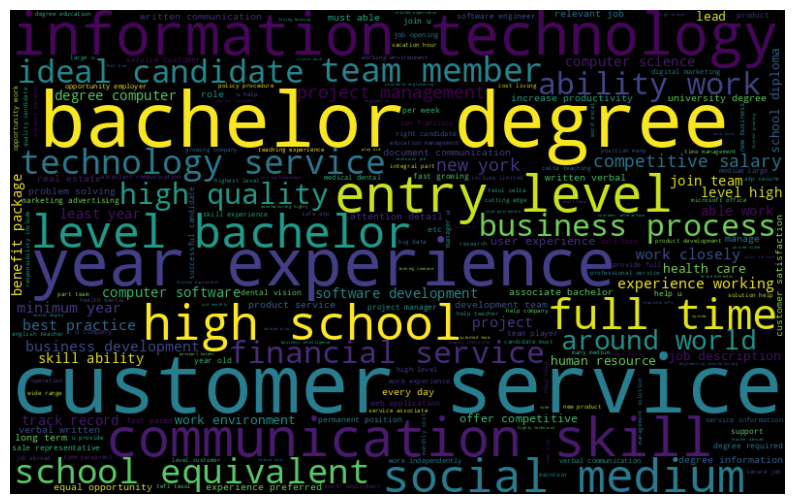

In [ ]:
# Filter out words that are 'None' or empty strings after lemmatization
lemmatized_words_without_none = [word for word in lemmatized_words_cloud if word and word.lower() != 'none']
# Combine the filtered words into a single string
all_words = ' '.join(lemmatized_words_without_none)
# Create a WordCloud object with specified parameters
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=120).generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# Show the plot
plt.show()

In [ ]:
#change text to string of sentance
text = [str(sentence) for sentence in text]

In [ ]:
# Initialize an empty list to store tokenized sentences
token_text = []
# Iterate over each sentence in the 'text' list
for sentence in text:
    tokens = word_tokenize(sentence)
    token_text.append(tokens)

In [ ]:
# Create a list comprehension to convert each word to lowercase in each sentence
lower_tokens = [[t.lower() for t in tokens] for tokens in token_text]

In [ ]:
#create a list of only alphabets
text_only_alphabets = [[t for t in tokens if t.isalpha()] for tokens in lower_tokens]

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Fetch the list of English stopwords using NLTK
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# Fetch the list of English stopwords using NLTK
english_stopped = stopwords.words('english')
# Remove stopwords from each list of tokens in 'text_only_alphabets'
no_stops = [[t for t in tokens if t not in english_stopped] for tokens in text_only_alphabets]

In [ ]:
# Create a WordNetLemmatizer object for lemmatizing words
lemmatizer = WordNetLemmatizer()

In [ ]:
# Lemmatize each word in each list of tokens in 'no_stops'
lemmatized_words = [[lemmatizer.lemmatize(t) for t in tokens] for tokens in no_stops]

In [ ]:
lemmatized_words[0]

['marketing',
 'intern',
 'u',
 'created',
 'groundbreaking',
 'cooking',
 'site',
 'support',
 'connect',
 'celebrate',
 'home',
 'cook',
 'give',
 'everything',
 'need',
 'one',
 'top',
 'editorial',
 'business',
 'engineering',
 'team',
 'focused',
 'using',
 'technology',
 'find',
 'new',
 'better',
 'way',
 'connect',
 'people',
 'around',
 'specific',
 'food',
 'interest',
 'offer',
 'superb',
 'highly',
 'curated',
 'information',
 'food',
 'cooking',
 'attract',
 'talented',
 'home',
 'cook',
 'contributor',
 'country',
 'also',
 'publish',
 'professional',
 'like',
 'mario',
 'batali',
 'gwyneth',
 'paltrow',
 'danny',
 'meyer',
 'partnership',
 'whole',
 'food',
 'market',
 'random',
 'named',
 'best',
 'food',
 'website',
 'james',
 'beard',
 'foundation',
 'iacp',
 'featured',
 'new',
 'york',
 'time',
 'npr',
 'pando',
 'daily',
 'techcrunch',
 'today',
 'located',
 'chelsea',
 'new',
 'york',
 'city',
 'james',
 'beard',
 'online',
 'food',
 'community',
 'curated',
 'rec

In [ ]:
# Filter out words that are 'None' or empty strings after lemmatization
final_text = [
    [word for word in tokens if word and word.lower() != 'none']
    for tokens in lemmatized_words
]

In [ ]:
#drop all the columns that were combied in text column
drop_columns = ['title','country','company_profile', 'description', 'requirements', 'benefits','required_experience', 'required_education', 'industry', 'function' ]
df = df.drop(columns =drop_columns)

In [ ]:
df['text']=final_text

In [ ]:
df

,location,department,salary_range,telecommuting,has_company_logo,has_questions,employment_type,fraudulent,text
0,"US, NY, New York",Marketing,None,0,1,0,Other,0,"[marketing, intern, u, created, groundbreaking..."
1,"NZ, , Auckland",Success,None,0,1,0,Full-time,0,"[customer, service, cloud, video, production, ..."
2,"US, IA, Wever",None,None,0,1,0,None,0,"[commissioning, machinery, assistant, cma, u, ..."
3,"US, DC, Washington",Sales,None,0,1,0,Full-time,0,"[account, executive, washington, dc, u, passio..."
4,"US, FL, Fort Worth",None,None,0,1,1,Full-time,0,"[bill, review, manager, u, spotsource, solutio..."
...,...,...,...,...,...,...,...,...,...
17875,"CA, ON, Toronto",Sales,None,0,1,1,Full-time,0,"[account, director, distribution, ca, vend, lo..."
17876,"US, PA, Philadelphia",Accounting,None,0,1,1,Full-time,0,"[payroll, accountant, u, weblinc, platform, se..."
17877,"US, TX, Houston",None,None,0,0,0,Full-time,0,"[project, cost, control, staff, engineer, cost..."
17878,"NG, LA, Lagos",None,None,0,0,1,Contract,0,"[graphic, designer, ng, nemsia, studio, lookin..."


In [ ]:
df['text'] = df['text'].apply(lambda tokens: ' '.join(tokens))


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Instantiate RandomUnderSampler
rus = RandomUnderSampler(random_state=42)


X = df.drop('fraudulent', axis=1)
y = df['fraudulent']

#resample the data
X_resampled, y_resampled = rus.fit_resample(X, y)


resampled_data = pd.concat([pd.Series(y_resampled), pd.DataFrame(X_resampled)], axis=1)
resampled_data.columns = ['fraudulent'] + list(X.columns)

# Define a list of categorical columns
categorical_columns = [ 'location', 'department', 'salary_range',  'employment_type', 'text']
#categorical_columns = [ 'department', 'text']
resampled_data = pd.get_dummies(resampled_data, columns=categorical_columns)


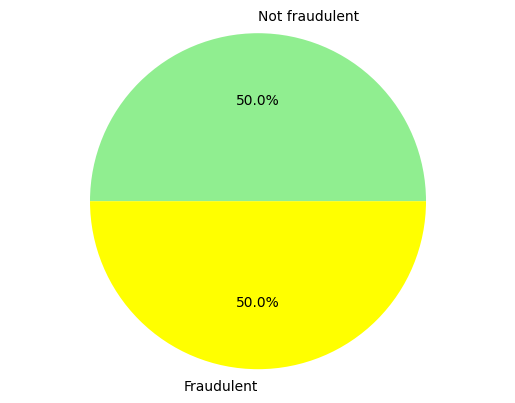

In [ ]:
#plot the pie chart for resampled data
labels = ['Not fraudulent', 'Fraudulent']
sizes = [resampled_data['fraudulent'].value_counts()[0], resampled_data['fraudulent'].value_counts()[1]]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors = ['lightgreen', 'yellow'])
plt.axis('equal')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import roc_curve, auc


In [ ]:
#assign training values
y = resampled_data['fraudulent']
X = resampled_data.loc[:,resampled_data.columns!='fraudulent']
print(X.shape)
X.head()


(1732, 2694)


,telecommuting,has_company_logo,has_questions,"location_AE, ,","location_AE, , Dubai","location_AE, DU, Dubai","location_AT, 5, Salzburg",location_AU,"location_AU, ,","location_AU, NSW,",...,text_work home ca let u show taught others like earn executive level income home opportunity billion dollar industryuncapped commissionsfull training amp support qualified candidate people already experienced huge rewardsability earn immediate incomefantastic reward effortfull availableno cold calling approaching friend amp familywork home businessnot mlmif laptop phone strong desire achieve success life opportunity looking take minute change life information visit someone professional mannerpositive outlookability work motivation create success yourselfa thinker approach see capable making incomethe desire enjoy benefit earning fantastic income maintaining work life balancegood communication english earn money spare time part time full time rich reward effort,text_work home easy money u dmt instant reward hiring time want internet base business money want make money internet home business need internet base business money join free make good money dmt instant reward home lost job need money fast start earning money u right one time life time chance bos work u earn good money time family information please contact email call get start right away call thank reading computer internet telephone company looking fill csr place job duty simple internet home business free sign free start without putting money looking make money without spending money work part time full time customer service representative home business job description answering incoming phone call replying email following existing caller selling experiance information ad please contact call,text_work home u mca associate receive eighty dollar membership submitted mca associate also receive residual monthly income member associate personally sign sign two individual per either member generate per week income receive weekly paper check delivered ups check direct deposited bank account receive first paycheck following friday begin work home career receive signups weekly company deadline fall saturday central time begin mca need pay benefit membership first last month paying work paying benefit would want receive haircut someone never cut hair would need benefit order properly sell benefit package understand good benefit keep mind signup one person doubled paid begin nothing lose note initial plan payment may paid either debit card credit card visa master card american express discover plan payment may also made active checking account however delay clearing fund also delay coverage ability start signing member opportunity serious business assure wonderful profitable decision positively affect financial future start computer er emergency road service dispatch provided help run gas flat tire battery dy also receive towing service hundred mile mile car broken protection limited normal also available boat motorcycle rv dually truck even livestock additional cost access locksmith locked vehicle emergency room expenditure protection benefit cover cost splint cast lab work iv transfusion anesthetic nursing care doctor care facility care receive daily hospital benefit paid facilitating hospital paid directly normal auto insurance policy cover hospital doctor expense keep money accidental death coverage plan accidental death benefit plan traffic court defense disbursement stolen automobile reward stolen farm equipment reward paid legal defense moving violation personal receive arrest bond receive jail bail bond stolen credit card protection receive travel planning assistance service whether traveling business pleasure discount ranging car rental company major hotel discount major provider vision dental prescription mca may offer additional benefit program feature benefit enhanced benefit coverage option may differ state,text_work home u seeking professional walk life variety profession work

In [ ]:
#train the data for modelling
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)


Navie bayes

In [ ]:
#modelling using Gussian Naive Bayes
nb = GaussianNB()
nb.fit(x_train, y_train)
#predict the values for Naive Bayes
y_pred_nb = nb.predict(x_test)
print("Navie Bayes Model Evaluation")
print(classification_report(y_test, y_pred_nb))

Navie Bayes Model Evaluation
              precision    recall  f1-score   support

           0       0.94      0.34      0.50       174
           1       0.60      0.98      0.74       173

    accuracy                           0.66       347
   macro avg       0.77      0.66      0.62       347
weighted avg       0.77      0.66      0.62       347



Confusion Matrix for Naive Bayes Model:
[[ 59 115]
 [  4 169]]


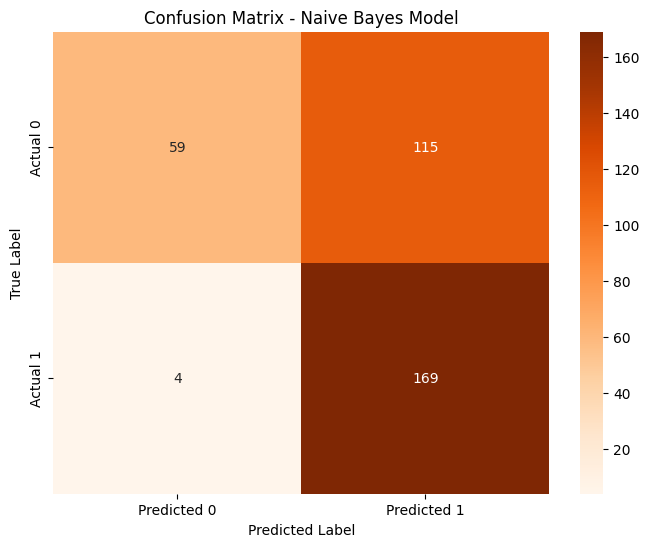

In [ ]:
# Assuming y_test and y_pred are already defined
Cfm_nb = confusion_matrix(y_test, y_pred_nb)

# Display the confusion matrix
print("Confusion Matrix for Naive Bayes Model:")
print(Cfm_nb)

# If you want to visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(Cfm_nb, annot=True, fmt="d", cmap="Oranges", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Naive Bayes Model")
plt.show()

0.657979536243439


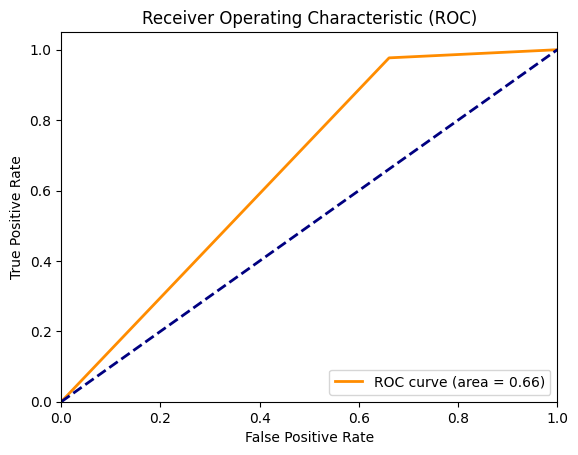

In [ ]:
#calculate roc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_nb)
roc_auc = auc(fpr, tpr)
print(roc_auc)
#plot the graph for ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
#display the graph
plt.show()

KNN

In [ ]:
# Fit a KNN model on the training data
k = 2 # Set the number of neighbors to consider
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)
# Predict the target variable on the testing data
y_pred_knn = knn.predict(x_test)
print("KNN Model Evaluation")
print(classification_report(y_test, y_pred_knn))


KNN Model Evaluation
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       174
           1       0.75      0.82      0.78       173

    accuracy                           0.78       347
   macro avg       0.78      0.78      0.77       347
weighted avg       0.78      0.78      0.77       347



Confusion Matrix for KNN Model:
[[128  46]
 [ 32 141]]


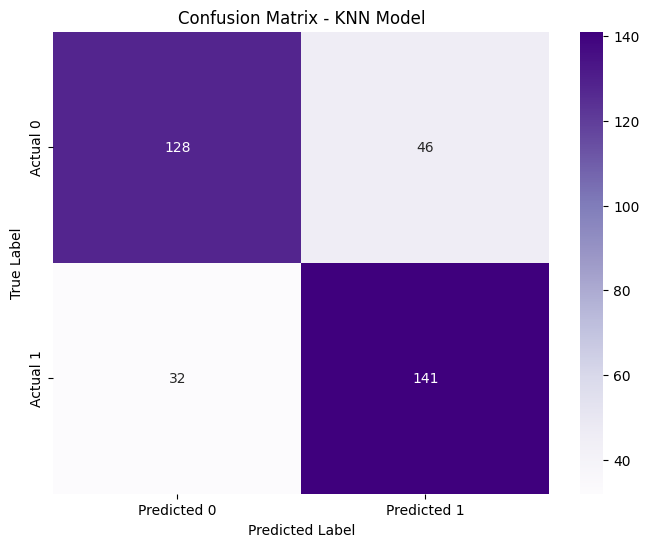

In [ ]:
# Assuming y_test and y_pred are already defined
Cfm_knn = confusion_matrix(y_test, y_pred_knn)

# Display the confusion matrix
print("Confusion Matrix for KNN Model:")
print(Cfm_knn)

# If you want to visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(Cfm_knn, annot=True, fmt="d", cmap="Purples", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - KNN Model")
plt.show()

ROC :  0.775330542821075


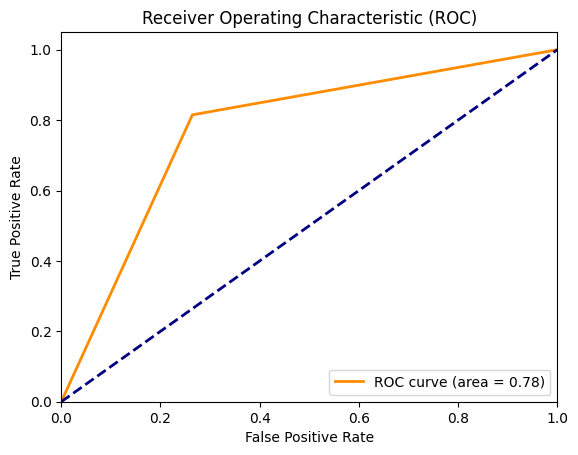

In [ ]:
# Calculate the ROC curve and area under the curve (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)
roc_auc = auc(fpr, tpr)
print("ROC : ", roc_auc)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
#Display ROC graph
plt.show()

LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred_log = log_reg.predict(x_test)
print("Logistic Regression Model Evaluation")
print(classification_report(y_test, y_pred_log))

Logistic Regression Model Evaluation
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       174
           1       0.81      0.89      0.85       173

    accuracy                           0.84       347
   macro avg       0.84      0.84      0.84       347
weighted avg       0.84      0.84      0.84       347



Confusion Matrix for Logistic Regression Model:
[[138  36]
 [ 19 154]]


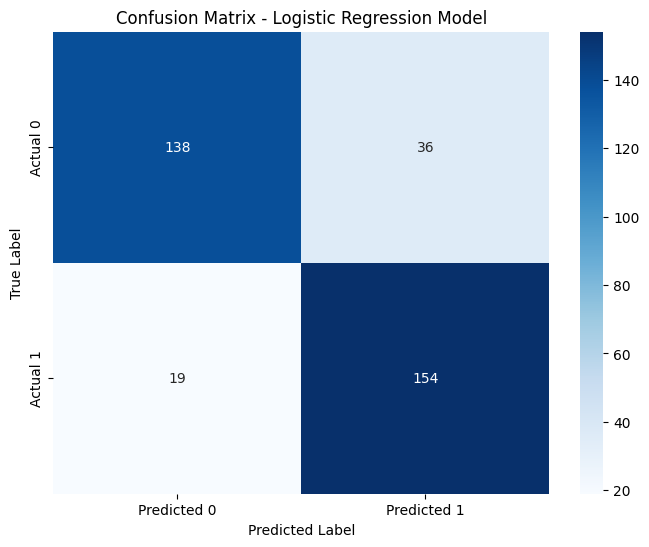

In [ ]:
# Assuming y_test and y_pred_log are already defined
cm_log = confusion_matrix(y_test, y_pred_log)

# Display the confusion matrix
print("Confusion Matrix for Logistic Regression Model:")
print(cm_log)

# If you want to visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression Model")
plt.show()


0.8416384293402432


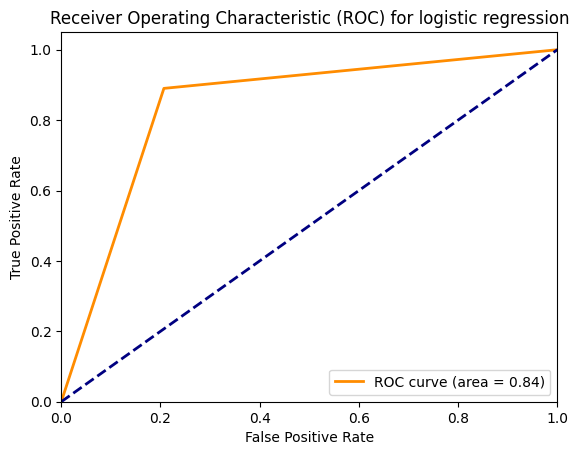

In [ ]:
#calculate ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_log)
roc_auc = auc(fpr, tpr)
print(roc_auc)
#plot ROC graph
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for logistic regression')
plt.legend(loc="lower right")
#display ROC graph
plt.show()

RANDOM FOREST

In [ ]:
#random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
#train random forest
rf_classifier.fit(x_train, y_train)
y_pred_rf = rf_classifier.predict(x_test)
print("Random Forest Model Evaluation")
#display values
print(classification_report(y_test, y_pred_rf))

Random Forest Model Evaluation
              precision    recall  f1-score   support

           0       0.89      0.80      0.84       174
           1       0.82      0.90      0.86       173

    accuracy                           0.85       347
   macro avg       0.85      0.85      0.85       347
weighted avg       0.85      0.85      0.85       347



Confusion Matrix for Random Forest Model:
[[140  34]
 [ 18 155]]


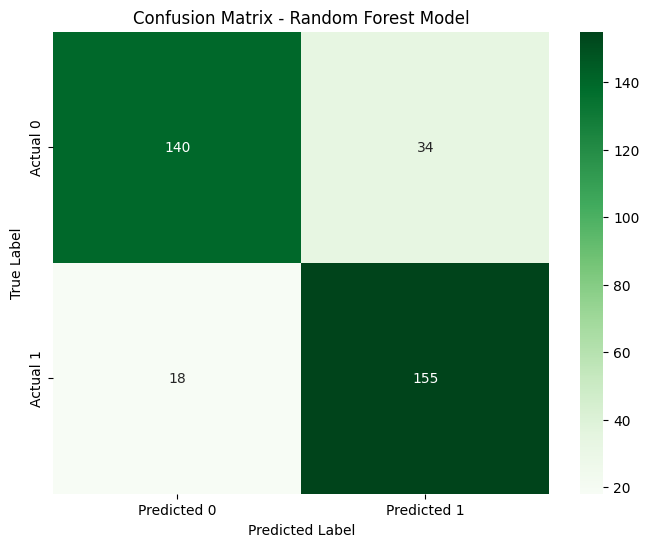

In [ ]:
# Assuming y_test and y_pred_rf are already defined
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Display the confusion matrix
print("Confusion Matrix for Random Forest Model:")
print(cm_rf)

# If you want to visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest Model")
plt.show()

0.8502757291874294


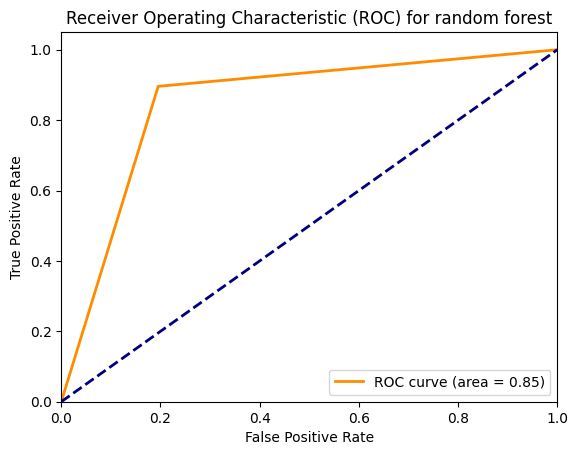

In [ ]:
#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
roc_auc = auc(fpr, tpr)
print(roc_auc)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for random forest')
plt.legend(loc="lower right")
#show ROC
plt.show()

**COMPARISION OF MODELS**

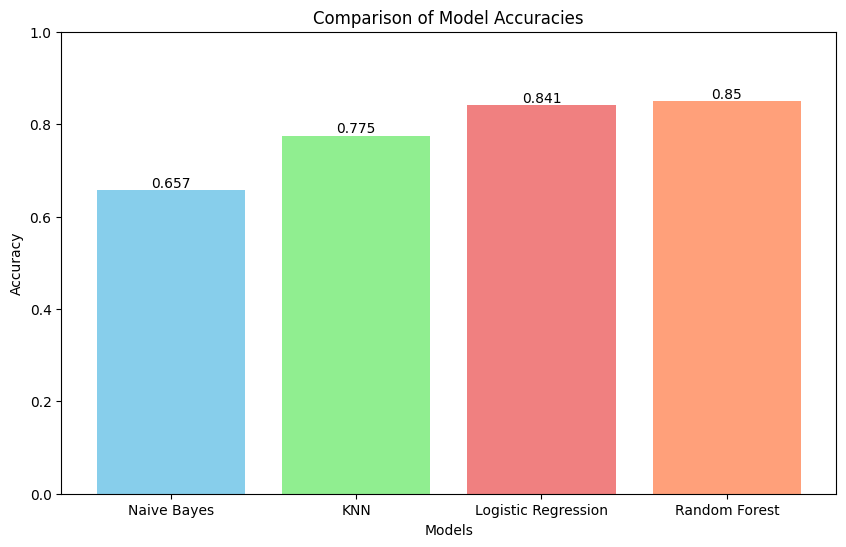

In [ ]:
# Assuming y_test, y_pred_nb, y_pred_knn, y_pred_log, and y_pred_rf are already defined

# Calculate accuracies for each model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_log = accuracy_score(y_test, y_pred_log)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Model names
models = ['Naive Bayes', 'KNN', 'Logistic Regression', 'Random Forest']

# Corresponding accuracies
accuracies = [accuracy_nb, accuracy_knn, accuracy_log, accuracy_rf]

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon'])
plt.ylim(0, 1)  # Set y-axis range to represent accuracy percentage (0-1)
plt.title('Comparison of Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')

# Add annotations to display accuracies on the bars
for bar, accuracy in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(accuracy, 3), ha='center', va='bottom', color='black', fontsize=10)

plt.show()